# Air transportation Ocurrences
## Preprocessing

In [4]:
%load_ext autoreload
%autoreload 2

In [5]:
import sys
sys.path.append("../scripts")

In [6]:
from data_loader import load_data_from_csv
from common.export_csv import exportDataVersion
import pandas as pd
import numpy as np

### <font color=#43599e>Loading Data</font>

In [8]:
#Load data
df = load_data_from_csv('fullData_V1.csv')
#Data length
print(f"# of rows 'fullData_V1.csv': {len(df)}")

# of rows 'fullData_V1.csv': 48454


/Users/aryan/Desktop/DA Project/DataAnalysisProject/notebooks/../scripts/data_loader.py:7: DtypeWarning: Columns (41,47,59,64) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(filepath)


,OccID,OccNo,AirportID_AirportName,AirportID_CountryID_DisplayEng,AirportID_ProvinceID_DisplayEng,Location,Latitude,Longitude,ICAO,BearingID_Abbr,...,DepartAirportID_AirportName,FlightPlanTypeID_DisplayEng,OperationTypeID_DisplayEng,CarsSubpartID_DisplayEng,FlightNo,DangerousGoodEnum_DisplayEng,ICAODepart,ICAODestination,SurvivableEnum_DisplayEng,ICAO_DisplayEng
0,150172,A17A0047,NaN,NaN,NaN,NaN,46.284740,63.644120,NaN,NaN,...,NaN,NaN,PLEASURE/TRAVEL,RECREATIONAL AVIATION,NaN,No,NaN,\r,\N,COLLISION WITH OBSTACLE(S) DURING TAKEOFF AND ...
1,150171,A17C0081,Industrial Park,CANADA,MANITOBA,Gimli,50.772778,96.821389,CYGM,NE,...,ST. THERESA POINT,VFR FLIGHT ITINERARY,AIR TRANSPORT,703 - AIR TAXI,C-GWCP,Unknown,CYST,CYAV\r,\N,SYSTEM/COMPONENT FAILURE OR MALFUNCTION (NON-P...
2,150170,A17F0159,San Francisco Intl,UNITED STATES,CALIFORNIA,San Francisco,37.638169,122.375428,KSFO,NaN,...,Lester B. Pearson Intl,ICAO IFR FLIGHT PLAN,AIR TRANSPORT,705 - AIRLINER,ACA759,No,CYYZ,KSFO\r,Yes\r,NAVIGATION ERRORS (NAV)
3,150169,A17C0080,FORT FRANCES MUNI,CANADA,ONTARIO,FORT FRANCES,48.650000,93.500000,CYAG,W,...,FORT FRANCES MUNI,VFR FLIGHT ITINERARY,AIR TRANSPORT,704 - COMMUTER,BLS345,No,CYAG,CYQK\r,\N,TURBULENCE ENCOUNTER (TURB)
4,150168,A17C0079,Baker Lake,CANADA,NUNAVUT,Baker Lake,66.448611,92.464444,CYBK,NW,...,NaN,VFR FLIGHT ITINERARY,AIR TRANSPORT,703 - AIR TAXI,C-GGSV,No,NaN,\r,\N,COLLISION WITH OBSTACLE(S) DURING TAKEOFF AND ...


In [54]:
df = df.replace("NaN", np.nan)
print(df.isnull().sum())
pd.set_option('display.max_rows', None)  # Show all rows
pd.set_option('display.max_columns', None)  # Show all columns
df.head()

OccID                                      0
OccNo                                      0
Latitude                                   0
Longitude                                  0
CountryID_DisplayEng                       0
OccClassID_DisplayEng                      0
OccDate                                    0
OccIncidentTypeID_DisplayEng           20182
OccRegionID_DisplayEng                    30
OccTime                                    0
OccTypeID_DisplayEng                       0
TsbInvolveID_DisplayEng                11896
OceanID_DisplayEng                     47166
PositionTypeEnum_DisplayEng                0
ProvinceID_DisplayEng                   2442
InitTSBNotifDate                           0
ReportedByID_DisplayEng                    0
RespRegionID_DisplayEng                  131
Summary                                   99
InjuriesEnum_DisplayEng                    0
DeployedEnum_DisplayEng                  139
RegistrationNo                             1
AircraftTy

,OccID,OccNo,Latitude,Longitude,CountryID_DisplayEng,OccClassID_DisplayEng,OccDate,OccIncidentTypeID_DisplayEng,OccRegionID_DisplayEng,OccTime,OccTypeID_DisplayEng,TsbInvolveID_DisplayEng,OceanID_DisplayEng,PositionTypeEnum_DisplayEng,ProvinceID_DisplayEng,InitTSBNotifDate,ReportedByID_DisplayEng,RespRegionID_DisplayEng,Summary,InjuriesEnum_DisplayEng,DeployedEnum_DisplayEng,RegistrationNo,AircraftTypeID_DisplayEng,AircraftMakeID_DisplayEng,OrganizationID_DisplayEng,OperatorTypeID_DisplayEng,WeightCategoryID_DisplayEng,LandingGearID_DisplayEng,WakeTurbulenceCategoryID_DisplayEng,YearOfManuf,NumberOfEngine,DamageLevelID_DisplayEng,OperationTypeID_DisplayEng,ICAODepart
0,150172,A17A0047,46.284740,63.644120,CANADA,CLASS 5,7/10/2017 12:00:00 AM,NaN,ATLANTIC,14:15:00,ACCIDENT,RESPONSIBLE,NaN,DDMMSS.SS,PRINCE EDWARD ISLAND,7/10/2017 12:00:00 AM,OWNER OF AIRCRAFT,ATLANTIC,C-IICE a privately operated Quad City Challeng...,Yes,No,C-IICE,ADVANCED ULTRALIGHT,CHALLENGER,NaN,PRIVATE,0-2250 KG (0-4960 LBS),TRICYCLE FIXED,LIGHT,2015.0,1,SUBSTANTIAL,PLEASURE/TRAVEL,NaN
1,150171,A17C0081,50.772778,96.821389,CANADA,CLASS 5,7/10/2017 12:00:00 AM,ENGINE (i),CENTRAL,13:55:00,INCIDENT,RESPONSIBLE,NaN,DDMMSS.SS,MANITOBA,7/10/2017 12:00:00 AM,OPERATOR,CENTRAL,C-GWCP a Piper PA-32-300 aircraft operated by ...,No,No,C-GWCP,AEROPLANE,PIPER,MHA ENTERPRISES,COMMERCIAL,0-2250 KG (0-4960 LBS),TRICYCLE FIXED,LIGHT,1968.0,1,MINOR,AIR TRANSPORT,CYST
2,150170,A17F0159,37.638169,122.375428,UNITED STATES,CLASS 5,7/8/2017 12:00:00 AM,RISK OF COLLISION (x),FOREIGN,06:56:00,INCIDENT,ACCREDITED REP 3,NaN,DDMMSS.SS,CALIFORNIA,7/9/2017 12:00:00 AM,FOREIGN AIB,HEAD OFFICE,C-FKCK an Airbus 320-200 aircraft operated by ...,No,No,C-FKCK,AEROPLANE,AIRBUS,AIR CANADA,COMMERCIAL,27001-272000 KG (59526-599650 LBS),TRICYCLE ALL RETRACT,MEDIUM,1991.0,2,NONE,AIR TRANSPORT,CYYZ
3,150169,A17C0080,48.650000,93.500000,CANADA,CLASS 5,7/5/2017 12:00:00 AM,DIFFICULT TO CONTROL (iv),CENTRAL,02:15:00,INCIDENT,RESPONSIBLE,NaN,DDMMSS.SS,ONTARIO,7/7/2017 12:00:00 AM,OPERATOR,CENTRAL,C-GJVC a Fairchild SA227-DC aircraft operated ...,Yes,No,C-GJVC,AEROPLANE,FAIRCHILD,BEARSKIN LAKE AIR SERVICE,COMMERCIAL,5701-27000 KG (12566-59525 LBS),TRICYCLE ALL RETRACT,MEDIUM,1996.0,2,NONE,AIR TRANSPORT,CYAG
4,150168,A17C0079,66.448611,92.464444,CANADA,CLASS 5,7/2/2017 12:00:00 AM,NaN,CENTRAL,22:00:00,ACCIDENT,RESPONSIBLE,NaN,DDMMSS.SS,NUNAVUT,7/5/2017 12:00:00 AM,OPERATOR,CENTRAL,C-GGSV an Aerospatiale AS 350 B-2 aircraft ope...,No,No,C-GGSV,HELICOPTER,AEROSPATIALE,GREAT SLAVE HELICOPTERS,COMMERCIAL,0-2250 KG (0-4960 LBS),SKID,LIGHT,1989.0,1,SUBSTANTIAL,AIR TRANSPORT,NaN


### <font color=#43599e>Deleting features without data</font>

In [12]:
df = df.drop(columns=['BearingID_Abbr', 'BearingID_CompassPoint', 'AirportID_AirportName', 
              'AirportID_CountryID_DisplayEng', 'Location', 'AirportID_ProvinceID_DisplayEng',
             'ICAO', 'BearingID_Highest', 'BearingID_Lowest', 'BearingID_Middle',
              'Distance','DistanceEnumEng', 'LocationDescription',
              'DistanceEnumEng', 'SeriousIncidentEnum_DisplayEng', 'TimeZoneID_DisplayEng',
             'IIC_FullName','CommonName', 'TotalFatalCount', 'TotalMinorCount', 'TotalNoneCount',
             'TotalSeriousCount', 'TotalUnknownCount', 'NoAircraftInvolved', 'SafetyCommIssuedEnum', 'AcID',
             'AircraftVersion','AircraftID', 'SerialNo', 'AircraftModelID_DisplayEng', 'AircraftSeries', 'AircraftCommonNameID_DisplayEng',
             'WeightCategoryID_MaxWeightCat', 'WeightCategoryID_MinWeightCat', 'MaxTakeOffWeight', 'DestAirportID_AirportName',
             'DepartAirportID', 'DepartAirportID_AirportName', 'FlightPlanTypeID_DisplayEng', 'CarsSubpartID_DisplayEng', 
             'FlightNo', 'DangerousGoodEnum_DisplayEng', 'ICAODestination', 'SurvivableEnum_DisplayEng', 'ICAO_DisplayEng'])

In [13]:
print(df.isnull().sum())

OccID                                      0
OccNo                                      0
Latitude                                   0
Longitude                                  0
CountryID_DisplayEng                       0
OccClassID_DisplayEng                      0
OccDate                                    0
OccIncidentTypeID_DisplayEng           20182
OccRegionID_DisplayEng                    30
OccTime                                    0
OccTypeID_DisplayEng                       0
TsbInvolveID_DisplayEng                11896
OceanID_DisplayEng                     47166
PositionTypeEnum_DisplayEng                0
ProvinceID_DisplayEng                   2442
InitTSBNotifDate                           0
ReportedByID_DisplayEng                    0
RespRegionID_DisplayEng                  131
Summary                                   99
InjuriesEnum_DisplayEng                    0
DeployedEnum_DisplayEng                  139
RegistrationNo                             1
AircraftTy

### <font color='purple'>FullData_V2</font>
Contains the dataset with features to use 

In [15]:
#exportDataVersion(df, 2)

### <font color=#43599e>Handling nulls</font>

#### Latitude and Longitude
Latitude and longitud have no nulls but 0 values. 

In [17]:
from preprocessing.constants_preprocessing import OCEAN_COORDINATES, OCEAN_PROVINCES_COORDINATES, COUNTRY_PROVINCE_COORDINATES, COUNTRIES_COORDINATES

In [18]:
df_handling_lat_lon = df.copy(); 
filtered_df_lat_lon = df[(df_handling_lat_lon["Latitude"] == 0) & (df_handling_lat_lon["Longitude"] == 0)]
print(f"Number of rows: {len(filtered_df_lat_lon)}")

Number of rows: 1501


In [19]:
columns_to_include = ["Latitude", "Longitude", "CountryID_DisplayEng", "OccRegionID_DisplayEng", "OceanID_DisplayEng", 
                      "ProvinceID_DisplayEng", "RespRegionID_DisplayEng"] 

filtered_df_lat_lon = filtered_df_lat_lon[columns_to_include]
filtered_df_lat_lon.head(10)

,Latitude,Longitude,CountryID_DisplayEng,OccRegionID_DisplayEng,OceanID_DisplayEng,ProvinceID_DisplayEng,RespRegionID_DisplayEng
14,0.0,0.0,INTERNATIONAL WATERS,FOREIGN,NORTH ATLANTIC OCEAN,NaN,HEAD OFFICE
24,0.0,0.0,CANADA,PACIFIC,NaN,BRITISH COLUMBIA,PACIFIC
30,0.0,0.0,INTERNATIONAL WATERS,FOREIGN,NORTH ATLANTIC OCEAN,NaN,HEAD OFFICE
86,0.0,0.0,CANADA,ATLANTIC,NaN,NOVA SCOTIA,ATLANTIC
100,0.0,0.0,CANADA,PACIFIC,NaN,BRITISH COLUMBIA,PACIFIC
234,0.0,0.0,CANADA,PACIFIC,NaN,BRITISH COLUMBIA,PACIFIC
449,0.0,0.0,UNITED STATES,FOREIGN,NaN,NORTH CAROLINA,HEAD OFFICE
467,0.0,0.0,CANADA,ATLANTIC,NaN,QUEBEC,ATLANTIC
890,0.0,0.0,CANADA,QUEBEC,NaN,QUEBEC,QUEBEC
1224,0.0,0.0,CANADA,QUEBEC,NaN,QUEBEC,QUEBEC


In [21]:
def calculate_coordinates(row):
    if(row["OceanID_DisplayEng"] is not None and not pd.isna(row["OceanID_DisplayEng"])):
        return OCEAN_COORDINATES[row["OceanID_DisplayEng"]]
        
    elif row["CountryID_DisplayEng"] == "INTERNATIONAL WATERS":
        if(row["OceanID_DisplayEng"] is not None): 
            return OCEAN_COORDINATES[row["OceanID_DisplayEng"]]
            
    elif(row["OccRegionID_DisplayEng"] in OCEAN_PROVINCES_COORDINATES):
        if(row["ProvinceID_DisplayEng"] in OCEAN_PROVINCES_COORDINATES[row["OccRegionID_DisplayEng"]]):
            return OCEAN_PROVINCES_COORDINATES[row["OccRegionID_DisplayEng"]][row["ProvinceID_DisplayEng"]]

    elif(row["CountryID_DisplayEng"] in COUNTRY_PROVINCE_COORDINATES):
        if(row["ProvinceID_DisplayEng"] in COUNTRY_PROVINCE_COORDINATES[row["CountryID_DisplayEng"]]):
            return COUNTRY_PROVINCE_COORDINATES[row["CountryID_DisplayEng"]][row["ProvinceID_DisplayEng"]]
    
    elif(pd.isna(row["ProvinceID_DisplayEng"]) and row["OccRegionID_DisplayEng"] == "FOREIGN"):
        if(row["CountryID_DisplayEng"] in COUNTRIES_COORDINATES):
            return COUNTRIES_COORDINATES[row["CountryID_DisplayEng"]]
    return [0,0]

In [22]:
for idx, row in filtered_df_lat_lon.iterrows():
    new_lat, new_lon = calculate_coordinates(row)  #New values
    #Update data in original df
    df_handling_lat_lon.at[idx, "Latitude"] = new_lat        
    df_handling_lat_lon.at[idx, "Longitude"] = new_lon       


In [23]:
#updated_rows = df_handling_lat_lon.loc[filtered_df_lat_lon.index]
#updated_rows.head()

filtered_df_lat_lon = df[(df_handling_lat_lon["Latitude"] == 0) & (df_handling_lat_lon["Longitude"] == 0)]
filtered_df_lat_lon = filtered_df_lat_lon[columns_to_include]
filtered_df_lat_lon.head(30)

,Latitude,Longitude,CountryID_DisplayEng,OccRegionID_DisplayEng,OceanID_DisplayEng,ProvinceID_DisplayEng,RespRegionID_DisplayEng
3887,0.0,0.0,UNKNOWN,FOREIGN,NaN,NaN,HEAD OFFICE
6330,0.0,0.0,UNITED STATES,FOREIGN,NaN,NaN,ONTARIO
7321,0.0,0.0,UNITED STATES,FOREIGN,NaN,NaN,QUEBEC
8046,0.0,0.0,CANADA,WESTERN,NaN,NaN,WESTERN
9519,0.0,0.0,UNITED KINGDOM,WESTERN,NaN,NaN,WESTERN
15081,0.0,0.0,UNKNOWN,FOREIGN,NaN,NaN,HEAD OFFICE
15363,0.0,0.0,UNKNOWN,FOREIGN,NaN,NaN,HEAD OFFICE
17944,0.0,0.0,UNITED STATES,FOREIGN,NaN,NaN,ONTARIO
22465,0.0,0.0,MEXICO,QUEBEC,NaN,NaN,QUEBEC
22832,0.0,0.0,HONG KONG,WESTERN,NaN,NaN,WESTERN


In [24]:
unique_values = filtered_df_lat_lon["CountryID_DisplayEng"].unique()
print(unique_values)

['UNKNOWN' 'UNITED STATES' 'CANADA' 'UNITED KINGDOM' 'MEXICO' 'HONG KONG'
 'BELGIUM' 'CHINA' 'ITALY' 'JAPAN']


In [25]:
print(f"Number of rows: {len(filtered_df_lat_lon)}")

Number of rows: 36


In [26]:
unique_comb_df = df_handling_lat_lon[(df_handling_lat_lon["CountryID_DisplayEng"] == "CHILE")]
unique_combinations = unique_comb_df[["CountryID_DisplayEng", "ProvinceID_DisplayEng"]].drop_duplicates()
print(unique_combinations)

    CountryID_DisplayEng ProvinceID_DisplayEng
511                CHILE                   NaN


In [27]:
filtered_df_lat_lon.head()

,Latitude,Longitude,CountryID_DisplayEng,OccRegionID_DisplayEng,OceanID_DisplayEng,ProvinceID_DisplayEng,RespRegionID_DisplayEng
3887,0.0,0.0,UNKNOWN,FOREIGN,NaN,NaN,HEAD OFFICE
6330,0.0,0.0,UNITED STATES,FOREIGN,NaN,NaN,ONTARIO
7321,0.0,0.0,UNITED STATES,FOREIGN,NaN,NaN,QUEBEC
8046,0.0,0.0,CANADA,WESTERN,NaN,NaN,WESTERN
9519,0.0,0.0,UNITED KINGDOM,WESTERN,NaN,NaN,WESTERN


In [52]:
# df_handling_lat_lon = df_handling_lat_lon.drop(filtered_df_lat_lon.index)
print(filtered_df_lat_lon.index)
print(df_handling_lat_lon.index)


Index([ 3887,  6330,  7321,  8046,  9519, 15081, 15363, 17944, 22465, 22832,
       23628, 24973, 28316, 28973, 29437, 29938, 30286, 31967, 34418, 34424,
       34966, 38863, 40105, 40450, 40536, 41846, 41851, 41865, 41924, 41939,
       43219, 45280, 45312, 45373, 46137, 46324],
      dtype='int64')
Index([    0,     1,     2,     3,     4,     5,     6,     7,     8,     9,
       ...
       48444, 48445, 48446, 48447, 48448, 48449, 48450, 48451, 48452, 48453],
      dtype='int64', length=48418)


# Handling OccRegionID_DisplayEng

In [57]:
df["OccRegionID_DisplayEng"].unique()

array(['ATLANTIC', 'CENTRAL', 'FOREIGN', 'ONTARIO', 'PACIFIC', 'QUEBEC',
       'WESTERN', 'HEAD OFFICE', 'NORTH ATLANTIC', nan, '18:05:00',
       '21:10:00'], dtype=object)

In [70]:
df = df[~(df['OccRegionID_DisplayEng'].isna() | 
          (df['OccRegionID_DisplayEng'] == '21:10:00') | 
          (df['OccRegionID_DisplayEng'] == '18:05:00'))]

# Handling OccTypeID_DisplayEng

In [75]:
# should be deleted because it is a system generated number of DB management
df = df.drop(columns=["OccTypeID_DisplayEng"])

# Handling TsbInvolveID_DisplayEng

In [79]:
df["TsbInvolveID_DisplayEng"].unique()

array(['RESPONSIBLE', 'ACCREDITED REP 3', 'ACCREDITED REP 5',
       'SUPPORT ONLY', 'ACCREDITED REP 1', 'EXPERT (ANNEX 13 5.27)',
       'TRAINING', 'NONE', 'COORDINATOR IN CANADA', 'ACCREDITED REP.',
       nan, 'ACCREDITED REP 2'], dtype=object)

In [ ]:
# TODO: decide what to do with this column

# Handling OceanID_DisplayEng

In [82]:
df["OceanID_DisplayEng"].unique()

array([nan, 'NORTH PACIFIC OCEAN', 'NORTH ATLANTIC OCEAN', 'ARCTIC OCEAN',
       'SOUTH PACIFIC OCEAN', 'INDIAN OCEAN', 'MEDITERRANEAN SEA',
       'ANTARCTIC OCEAN', 'SOUTH ATLANTIC OCEAN', 'SOUTH CHINA SEA'],
      dtype=object)

In [86]:
null_oceanId_rows = df[df['OceanID_DisplayEng'].isnull()]
null_oceanId_rows.head()

,OccID,OccNo,Latitude,Longitude,CountryID_DisplayEng,OccClassID_DisplayEng,OccDate,OccIncidentTypeID_DisplayEng,OccRegionID_DisplayEng,OccTime,TsbInvolveID_DisplayEng,OceanID_DisplayEng,PositionTypeEnum_DisplayEng,ProvinceID_DisplayEng,InitTSBNotifDate,ReportedByID_DisplayEng,RespRegionID_DisplayEng,Summary,InjuriesEnum_DisplayEng,DeployedEnum_DisplayEng,RegistrationNo,AircraftTypeID_DisplayEng,AircraftMakeID_DisplayEng,OrganizationID_DisplayEng,OperatorTypeID_DisplayEng,WeightCategoryID_DisplayEng,LandingGearID_DisplayEng,WakeTurbulenceCategoryID_DisplayEng,YearOfManuf,NumberOfEngine,DamageLevelID_DisplayEng,OperationTypeID_DisplayEng,ICAODepart
0,150172,A17A0047,46.284740,63.644120,CANADA,CLASS 5,7/10/2017 12:00:00 AM,NaN,ATLANTIC,14:15:00,RESPONSIBLE,NaN,DDMMSS.SS,PRINCE EDWARD ISLAND,7/10/2017 12:00:00 AM,OWNER OF AIRCRAFT,ATLANTIC,C-IICE a privately operated Quad City Challeng...,Yes,No,C-IICE,ADVANCED ULTRALIGHT,CHALLENGER,NaN,PRIVATE,0-2250 KG (0-4960 LBS),TRICYCLE FIXED,LIGHT,2015.0,1,SUBSTANTIAL,PLEASURE/TRAVEL,NaN
1,150171,A17C0081,50.772778,96.821389,CANADA,CLASS 5,7/10/2017 12:00:00 AM,ENGINE (i),CENTRAL,13:55:00,RESPONSIBLE,NaN,DDMMSS.SS,MANITOBA,7/10/2017 12:00:00 AM,OPERATOR,CENTRAL,C-GWCP a Piper PA-32-300 aircraft operated by ...,No,No,C-GWCP,AEROPLANE,PIPER,MHA ENTERPRISES,COMMERCIAL,0-2250 KG (0-4960 LBS),TRICYCLE FIXED,LIGHT,1968.0,1,MINOR,AIR TRANSPORT,CYST
2,150170,A17F0159,37.638169,122.375428,UNITED STATES,CLASS 5,7/8/2017 12:00:00 AM,RISK OF COLLISION (x),FOREIGN,06:56:00,ACCREDITED REP 3,NaN,DDMMSS.SS,CALIFORNIA,7/9/2017 12:00:00 AM,FOREIGN AIB,HEAD OFFICE,C-FKCK an Airbus 320-200 aircraft operated by ...,No,No,C-FKCK,AEROPLANE,AIRBUS,AIR CANADA,COMMERCIAL,27001-272000 KG (59526-599650 LBS),TRICYCLE ALL RETRACT,MEDIUM,1991.0,2,NONE,AIR TRANSPORT,CYYZ
3,150169,A17C0080,48.650000,93.500000,CANADA,CLASS 5,7/5/2017 12:00:00 AM,DIFFICULT TO CONTROL (iv),CENTRAL,02:15:00,RESPONSIBLE,NaN,DDMMSS.SS,ONTARIO,7/7/2017 12:00:00 AM,OPERATOR,CENTRAL,C-GJVC a Fairchild SA227-DC aircraft operated ...,Yes,No,C-GJVC,AEROPLANE,FAIRCHILD,BEARSKIN LAKE AIR SERVICE,COMMERCIAL,5701-27000 KG (12566-59525 LBS),TRICYCLE ALL RETRACT,MEDIUM,1996.0,2,NONE,AIR TRANSPORT,CYAG
4,150168,A17C0079,66.448611,92.464444,CANADA,CLASS 5,7/2/2017 12:00:00 AM,NaN,CENTRAL,22:00:00,RESPONSIBLE,NaN,DDMMSS.SS,NUNAVUT,7/5/2017 12:00:00 AM,OPERATOR,CENTRAL,C-GGSV an Aerospatiale AS 350 B-2 aircraft ope...,No,No,C-GGSV,HELICOPTER,AEROSPATIALE,GREAT SLAVE HELICOPTERS,COMMERCIAL,0-2250 KG (0-4960 LBS),SKID,LIGHT,1989.0,1,SUBSTANTIAL,AIR TRANSPORT,NaN


In [90]:
# not important cell
null_oceanId_rows = df[df['RespRegionID_DisplayEng'].isnull()]
null_oceanId_rows.head()

,OccID,OccNo,Latitude,Longitude,CountryID_DisplayEng,OccClassID_DisplayEng,OccDate,OccIncidentTypeID_DisplayEng,OccRegionID_DisplayEng,OccTime,TsbInvolveID_DisplayEng,OceanID_DisplayEng,PositionTypeEnum_DisplayEng,ProvinceID_DisplayEng,InitTSBNotifDate,ReportedByID_DisplayEng,RespRegionID_DisplayEng,Summary,InjuriesEnum_DisplayEng,DeployedEnum_DisplayEng,RegistrationNo,AircraftTypeID_DisplayEng,AircraftMakeID_DisplayEng,OrganizationID_DisplayEng,OperatorTypeID_DisplayEng,WeightCategoryID_DisplayEng,LandingGearID_DisplayEng,WakeTurbulenceCategoryID_DisplayEng,YearOfManuf,NumberOfEngine,DamageLevelID_DisplayEng,OperationTypeID_DisplayEng,ICAODepart
12159,57828,A87F4013,0.0,0.00,UNITED STATES,HISTORICALLY UNSPECIFIED,10/18/1987 12:00:00 AM,J. ROC / LOS,FOREIGN,11:30:00,NaN,NaN,DD.DDDD,FLORIDA,10/18/1987 12:00:00 AM,UNKNOWN,NaN,ON FINAL APPR AT 5000' A/C OBS OTHER A/C 2NM ...,No,Unknown,REG-A87F4013,AEROPLANE,BOEING,AIR CANADA,NaN,27001-272000 KG (59526-599650 LBS),NaN,MEDIUM,1983.0,3,NONE,NaN,NaN
12160,57823,A87F4007,0.0,0.00,IRELAND,HISTORICALLY UNSPECIFIED,6/25/1987 12:00:00 AM,EMERGENCY/PRIORITY (xi),FOREIGN,00:00:00,NaN,NaN,DD.DDDD,NaN,6/25/1987 12:00:00 AM,UNKNOWN,NaN,ON APPROACH A/C HAD GEAR UNSAFE LIGHT ON L/BO...,No,Unknown,C-FTOD,AEROPLANE,BOEING,AIR CANADA,NaN,OVER 272001 KG (599651 LBS),NaN,HEAVY,1973.0,4,NONE,NaN,NaN
12378,56339,A86F4001,19.5,70.75,DOMINICAN REPUBLIC,HISTORICALLY UNSPECIFIED,3/30/1986 12:00:00 AM,J. ROC / LOS,FOREIGN,13:15:00,NaN,NaN,DD.DDDD,NaN,3/30/1986 12:00:00 AM,UNKNOWN,NaN,WHILE DEPARTING RAMP A/C COLLIDED WITH ANOTHE...,No,Unknown,C-GIFE,AEROPLANE,LOCKHEED,WORLDWAYS CANADA,NaN,27001-272000 KG (59526-599650 LBS),NaN,HEAVY,1974.0,3,MINOR,NaN,NaN
12867,52851,A83F0005,0.0,0.00,UNITED STATES,HISTORICALLY UNSPECIFIED,4/17/1983 12:00:00 AM,NaN,FOREIGN,13:30:00,NaN,NaN,DD.DDDD,GEORGIA,4/17/1983 12:00:00 AM,UNKNOWN,NaN,NaN,No,Unknown,C-GBOA,AEROPLANE,PIPER,AIR BOREAL,COMMERCIAL,0-2250 KG (0-4960 LBS),TRICYCLE FIXED,LIGHT,0.0,1,SUBSTANTIAL,TRAINING,NaN
13182,50856,A81F0001,0.0,0.00,GREENLAND,HISTORICALLY UNSPECIFIED,3/15/1981 12:00:00 AM,NaN,FOREIGN,08:00:00,NaN,NaN,DD.DDDD,NaN,3/15/1981 12:00:00 AM,UNKNOWN,NaN,ONE WHEEL BROKE THROUGH SEA ICE ON LANDING AN...,No,Unknown,C-FDHT,AEROPLANE,DE HAVILLAND,Bradley Air Services Limited/First Air,NaN,5701-27000 KG (12566-59525 LBS),NaN,MEDIUM,0.0,2,SUBSTANTIAL,NaN,NaN


In [104]:
from visualizations import plot_coordinates_matplotlib, plot_frequency

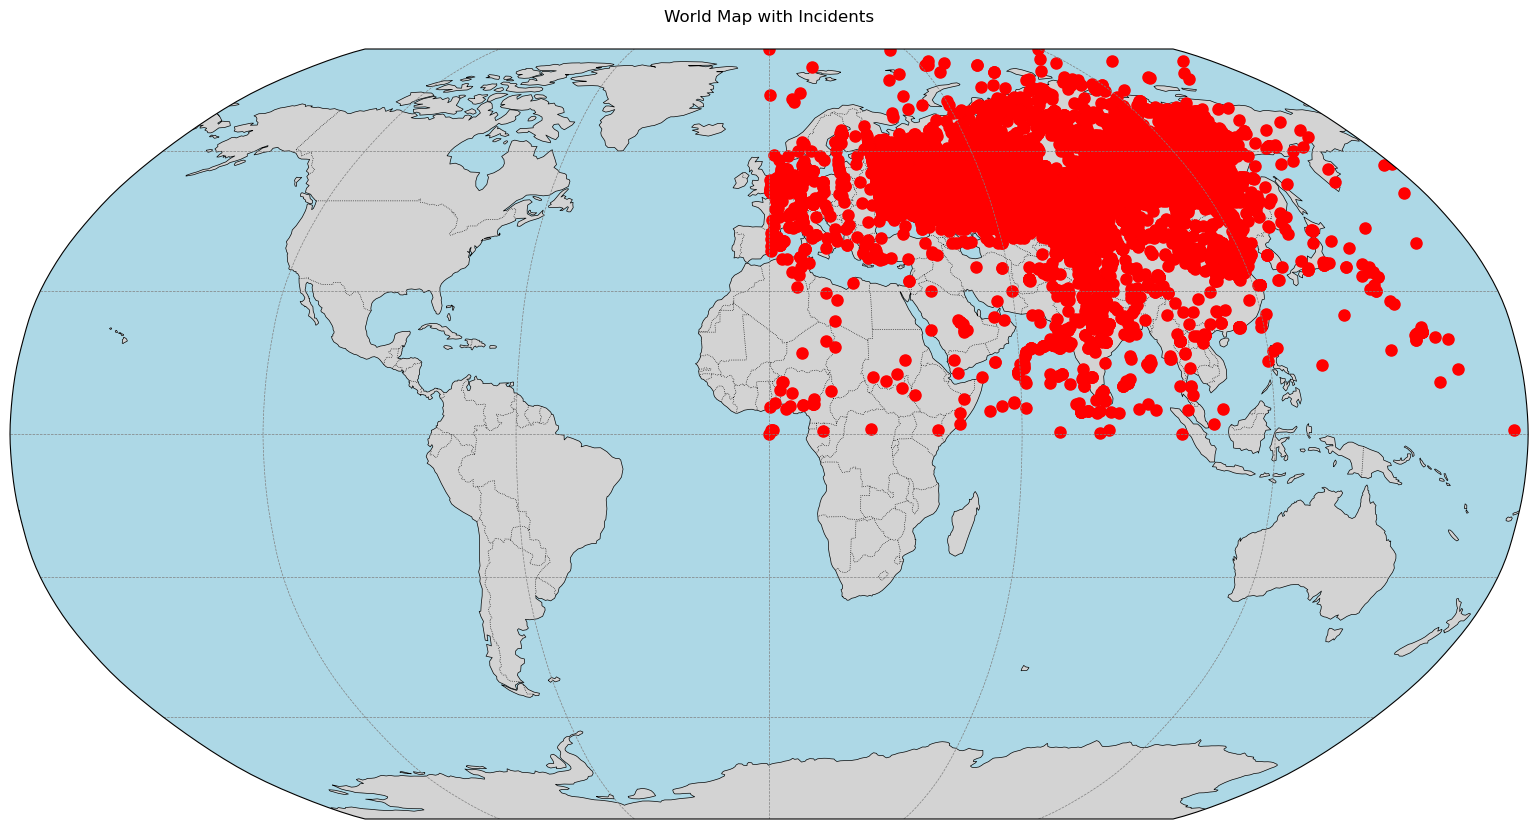

In [100]:
non_zero_coords = df[
    (df['Latitude'] != 0) & 
    (df['Longitude'] != 0)
][['Latitude', 'Longitude']]

# Convert DataFrame to list of tuples
coordinates_list = list(zip(non_zero_coords['Latitude'], non_zero_coords['Longitude']))
plot_coordinates_matplotlib(coordinates_list)
# TODO: do a visualization when we merge the updated longitudes and latitudes with the DF

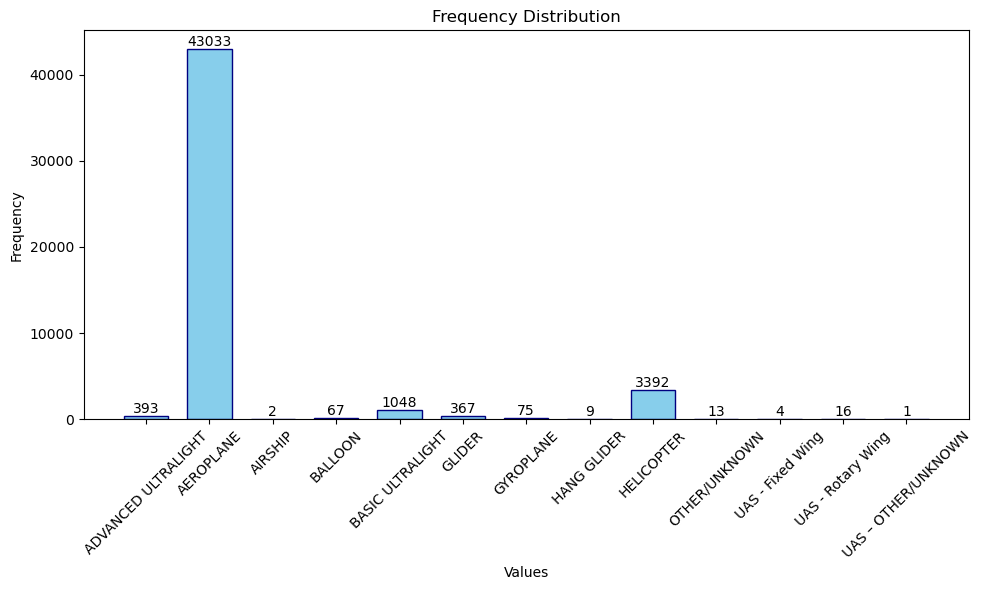

In [110]:
non_null_test_data = df['AircraftTypeID_DisplayEng'].dropna()
plot_frequency(non_null_test_data)
# TODO: handle the null values for Aircraft Type